In [ ]:
# https://www.kaggle.com/migalpha/spanish-names

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
female_names = pd.read_csv('female_names.csv')
male_names = pd.read_csv('male_names.csv')

In [ ]:
female_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24756 entries, 0 to 24755
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       24755 non-null  object 
 1   frequency  24756 non-null  int64  
 2   mean_age   24756 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 580.3+ KB


In [ ]:
# male_names.info()




Каждая таблица содержит 3 столбца - **имя**, **встречаемость** (абсолютное количество) - в таблицы вошли только те имена, которые встречаются не менее 20 раз, **средний возраст** людей с указанным именем. Дырок нет, все значения not-null

In [ ]:
female_names.describe()

,frequency,mean_age
count,24756.000000,24756.000000
mean,890.212716,38.630102
std,10761.927108,15.338650
min,20.000000,1.100000
25%,27.000000,28.000000
50%,44.000000,38.200000
75%,102.000000,49.100000
max,668639.000000,82.100000


In [ ]:
# male_names.describe()

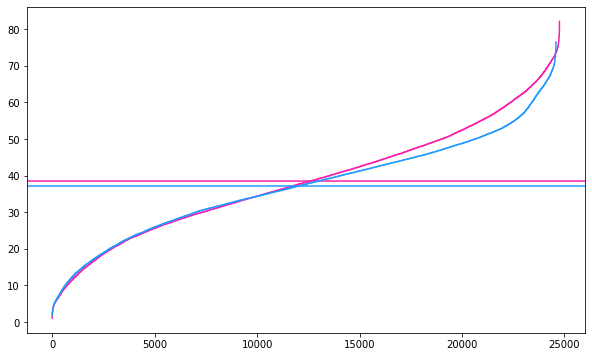

In [ ]:
fig = plt.figure(figsize=[10,6])

a1 = fig.add_subplot(1,1,1)

a1.plot(female_names.index,
        female_names.sort_values('mean_age').mean_age,
        color='#fa20aa')
a1.axhline(female_names.mean_age.mean(), color='#fa20aa')
a1.plot(male_names.index, 
        ale_names.sort_values('mean_age').mean_age,
        color='#209aff')
a1.axhline(male_names.mean_age.mean(), color='#209aff')
#a1.plot(male_names.index, male_names.mean_age, color='#209aff')
#a1.plot(0,half_male, marker='*', color='#209aff')

Средний возраст по столбцу "средний возраст носителей данного имени" - 38.6 для женщин и 37.1 для мужчин. Однако средние значения возраста жителей Испании отличаются: 42,0 года для мужчин и 44,6 - для женщин (2018 год). Что любопытно. Но средний возраст подсчитан только для коренных испанцев, приезжие моложе. Вероятно, данные по именам относятся к предыдущим десятилетиям. Ведь как известно, в последние годы (особенно в развитых странах) население стареет.
___
**На графике видно, что средний возраст мужчин ниже, чем женщин**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


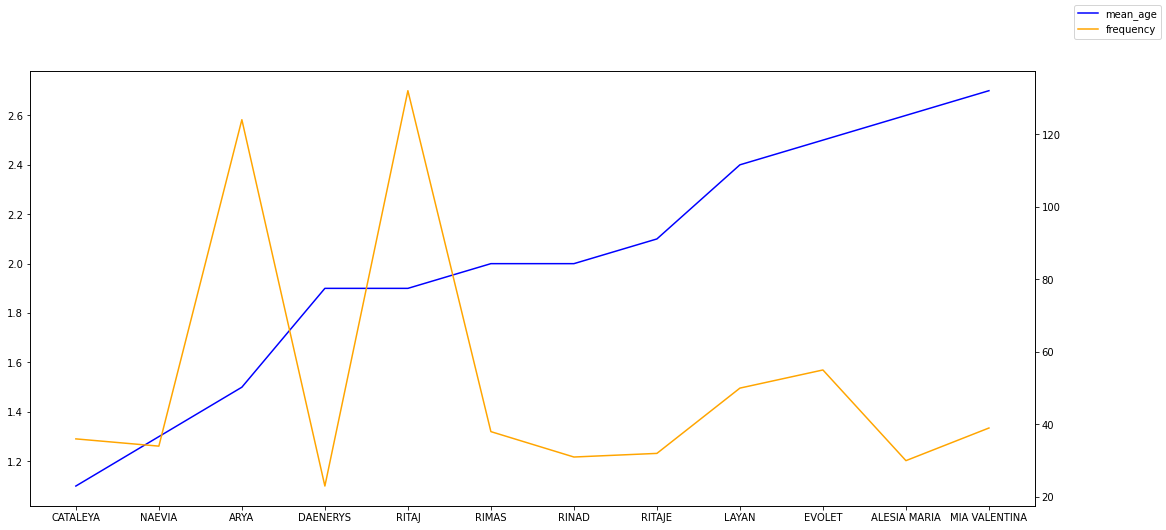

In [ ]:
num = 12
young_fem = female_names.sort_values('mean_age', ascending=True).head(num)

fig = plt.figure(figsize=(18,8))
plt.xticks(range(num), young_fem.name.tolist())
a1 = fig.add_subplot(1,1,1)
a2 = a1.twinx()

a1.plot(range(num), young_fem.mean_age, color='blue', label='mean_age')
a2.plot(range(num),
        young_fem.frequency, color='orange', label='frequency')
fig.legend()

По данному графику можно видеть, что испанцы смотрят игру престолов. \\
Раньше не  смотрели, потому что ее не было и детей Daenerys не называли, \\
а теперь смотрят и называют.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


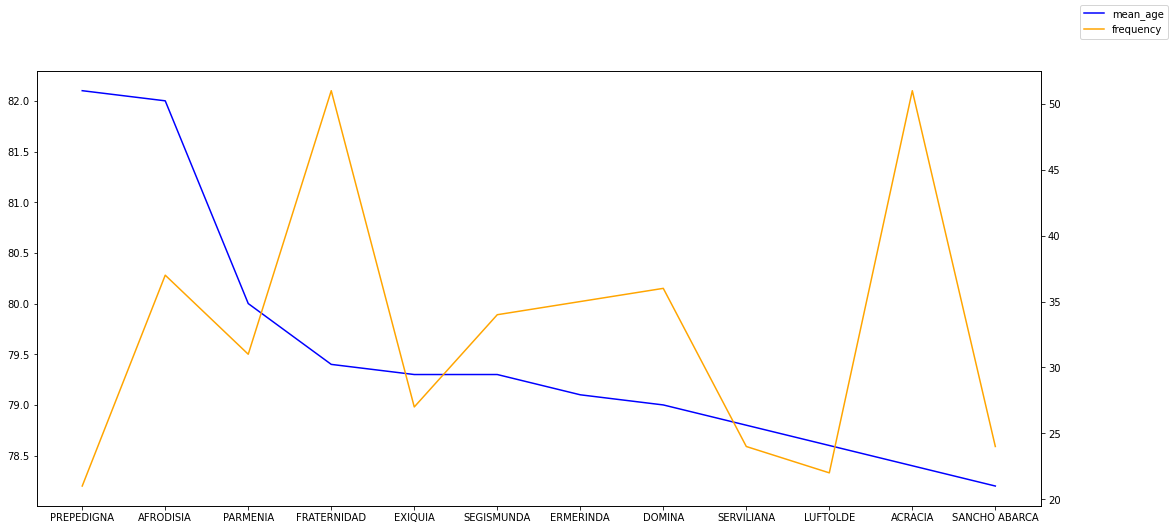

In [ ]:
num = 12
old_fem = female_names.sort_values('mean_age', ascending=False).head(num)

fig = plt.figure(figsize=(18,8))
plt.xticks(range(num), old_fem.name.tolist())
a1 = fig.add_subplot(1,1,1)
a2 = a1.twinx()

a1.plot(range(num), old_fem.mean_age, color='blue', label='mean_age')
a2.plot(range(num), old_fem.frequency, color='orange', label='frequency')
fig.legend()

80 лет! и это средний возраст. \\
Клавдия, Ефросинья, Раиса, Тамара, Антонина, Аксинья - вот и найдены их испанские аналоги.

In [ ]:
female_names.head(10)

,name,frequency,mean_age
0,MARIA CARMEN,668639,54.5
1,MARIA,633600,48.9
2,CARMEN,415535,60.2
3,JOSEFA,298346,66.4
4,ISABEL,279932,56.2
5,ANA MARIA,277090,48.8
6,MARIA PILAR,267272,54.5
7,MARIA DOLORES,265341,54.3
8,MARIA TERESA,256586,54.6
9,ANA,255010,43.1


In [ ]:
female_names.loc[female_names.name.isnull(), :]

,name,frequency,mean_age
5593,NaN,116,26.9


Здесь можно наблюдать очень интересное явление - имя **NA** решило превратиться в Not a Number. Исправлю это вручную.

In [ ]:
female_names.loc[female_names.name.isnull(), 'name'] = 'NA'

In [ ]:
female_names.loc[female_names.name.isnull(), :]

,name,frequency,mean_age


In [ ]:
male_names.isnull().sum()

name         0
frequency    0
mean_age     0
dtype: int64

Добавлю к таблицам столбец word_count и в него запишу количество слов в имени

In [ ]:
female_names['word_count'] = None
male_names['word_count'] = None

In [ ]:
def count_words(name):
  return len(name.split())

In [ ]:
female_names['word_count'] = female_names.name.apply(count_words)
male_names['word_count'] = male_names.name.apply(count_words)

In [ ]:
# посмотрев описание еще раз можем увидеть, что максимальная длина
# имени - 3 слова (как для женщин, так и для мужчин)
female_names.describe()

,frequency,mean_age,word_count
count,24756.000000,24756.000000,24756.000000
mean,890.212716,38.630102,1.644652
std,10761.927108,15.338650,0.503312
min,20.000000,1.100000,1.000000
25%,27.000000,28.000000,1.000000
50%,44.000000,38.200000,2.000000
75%,102.000000,49.100000,2.000000
max,668639.000000,82.100000,3.000000


In [ ]:
# male_names.describe()

Помимо количества слов в имени было бы интересно проверить, \\
сколько имен общих для мужчин и женщин.

Для этих целей сделаю merge

In [ ]:
common_names = pd.merge(female_names, male_names,
                        on=['name', 'word_count'])

In [ ]:
common_names.describe()

,frequency_x,mean_age_x,word_count,frequency_y,mean_age_y
count,653.000000,653.000000,653.000000,653.000000,653.000000
mean,4194.707504,32.344564,1.004594,1879.490046,32.054671
std,30947.130404,15.883909,0.067676,20464.369507,15.056555
min,20.000000,3.500000,1.000000,20.000000,3.300000
25%,33.000000,21.200000,1.000000,36.000000,22.800000
50%,64.000000,31.100000,1.000000,71.000000,31.200000
75%,194.000000,41.100000,1.000000,163.000000,39.600000
max,633600.000000,76.500000,2.000000,367726.000000,74.600000


Что можно увидеть?
Средняя частота (как для мужчин, так и для женщин) больше, чем по всем именам.
То есть среди редких имен меньше тех, которые встречаются у обоих полов,
чем среди более распространенных.

(array([650.,   3.,   0.]), array([1, 2, 3, 4]), <a list of 3 Patch objects>)

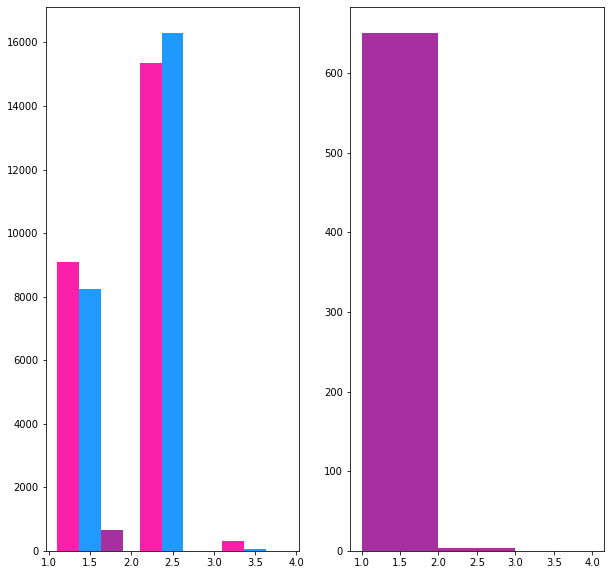

In [ ]:
fig = plt.figure(figsize=(10,10))
a1 = fig.add_subplot(1,2,1)
a2 = fig.add_subplot(1,2,2)

a1.hist(x=(
    female_names.word_count,
    male_names.word_count,
    common_names.word_count
    ),
    bins=range(1,5,1), color=('#fa20aa', '#209aff', '#a630a0'))

a2.hist(x=common_names.word_count,
         bins=range(1,5,1), color='#a630a0')



Кроме того, в таблице общих имен среднее количество слов в имени - едва больше \\
единицы (когда как в таблице отдельно для женщин 1.64, для мужчин 1.67) \\
То есть **обладание двойным (и тем более тройным) именем значительно уменьшает \\
 вероятность встретить тёзку среди представителей противоположного пола, \\
 что можно увидеть на графиках выше**
___
Приведу в порядок таблицу с общими именами... суммарная частота, средний \\
возраст по людям обоих полов и, наверное, отношение частоты встречаемости \\
у женщин ко всем людям - female_to_male in (0,1)

In [ ]:
common_names['frequency'] = \
  common_names.frequency_y+common_names.frequency_x
common_names['female_to_male'] = \
  common_names.frequency_x / common_names.frequency
common_names['mean_age'] = \
  (common_names.frequency_x*common_names.mean_age_x + \
   common_names.frequency_y*common_names.mean_age_y) / \
   common_names.frequency

In [ ]:
# выбираю имена, которые примерно одинаково часто встречаются среди обоих полов.
# большая их часть звучит не очень по-испански... просто наблюдение
common_names[
             (common_names.female_to_male < 0.53) & 
             (common_names.female_to_male > 0.47)
             ].head(10)

,name,frequency_x,mean_age_x,word_count,frequency_y,mean_age_y,frequency,female_to_male,mean_age
73,SIMONE,731,40.7,1,655,31.2,1386,0.527417,36.210462
91,GHEORGHITA,494,46.5,1,557,38.3,1051,0.470029,42.154234
92,GABRIELE,488,50.5,1,442,31.1,930,0.524731,41.279785
164,EDEN,192,18.6,1,172,22.2,364,0.527473,20.301099
179,VALERY,168,10.0,1,184,45.3,352,0.477273,28.452273
183,QI,162,24.5,1,156,27.4,318,0.509434,25.922642
222,AMANDEEP,122,26.0,1,109,25.2,231,0.528139,25.622511
226,MANDEEP,119,28.3,1,128,27.5,247,0.481781,27.885425
232,LIJUN,115,38.9,1,116,36.8,231,0.497835,37.845455
240,KULWINDER,107,37.6,1,113,35.6,220,0.486364,36.572727


In [ ]:
# еще можно поглядеть на то, сколько самых популярных имен нужно, чтобы сравняться с остальными
# может, всего 100 имен из 20+к покроют половине испанского населения? надо проверить
females = female_names.frequency.sum()
half = females / 2
sum_freq = 0
for index, name in female_names.iterrows():
  sum_freq += name['frequency']
  if sum_freq > half:
    break
half_female = index+1
print(sum_freq)
print(name['name'], index)

11052041
ANGELES 65


In [ ]:
males = male_names.frequency.sum()
half = males / 2
sum_freq = 0
for index, name in male_names.iterrows():
  sum_freq += name['frequency']
  if sum_freq > half:
    break
half_male = index+1
print(sum_freq)
print(name['name'], index)

10777334
EDUARDO 44


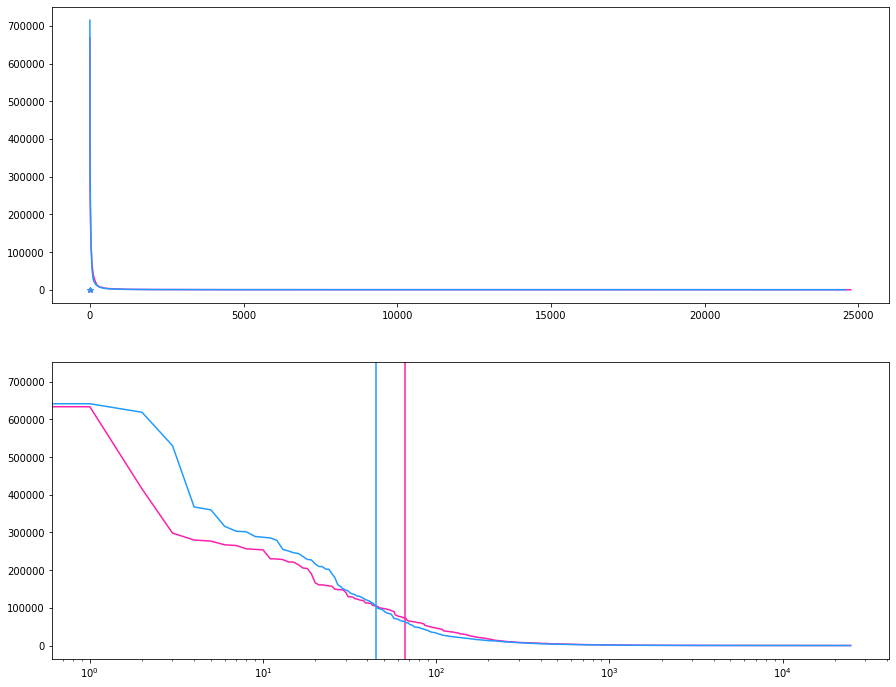

In [ ]:
fig = plt.figure(figsize=[15,12])

a1 = fig.add_subplot(2,1,1)
a2 = fig.add_subplot(2,1,2)

a1.plot(female_names.index, female_names.frequency, color='#fa20aa')
a1.plot(0,half_female, marker='*', color='#fa20aa')
a1.plot(male_names.index, male_names.frequency, color='#209aff')
a1.plot(0,half_male, marker='*', color='#209aff')

a2.set_xscale('log')
a2.plot(female_names.index, female_names.frequency, color='#fa20aa')
a2.axvline(half_female, color='#fa20aa')
a2.plot(male_names.index, male_names.frequency, color='#209aff')
a2.axvline(half_male, color='#209aff')

Оказалось, что половину всех испанских женщин называют одним из 66 имен \\
(индексация начинается с 0). \\
Для мужчин это число еще меньше - 45! \\
У другой половины разнообразие имен куда больше - 24.5 тысячи \\
___
**На нижнем графике вертикальные линии делят представителей женского \\
и мужского пола пополам \\
На верхнем графике на местах этих линий находятся звездочки.**

Ну и напоследок, надо выяснить, какие имена самые длинные

In [ ]:
female_names['length'] = female_names.name.apply(len)
male_names['length'] = male_names.name.apply(len)

In [ ]:
longest_fem = female_names.sort_values(
    'length', ascending=False).head(10).name.tolist()
longest_male = male_names.sort_values(
    'length', ascending=False).head(10).name.tolist()

Слева - самые длинные женские имена. Справа - мужские.

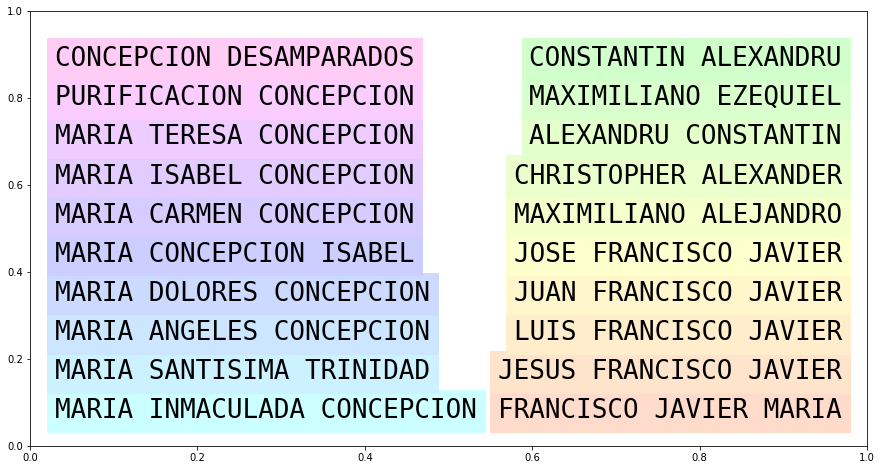

In [ ]:
import colorsys

fig = plt.figure(figsize=(15,8))
a1 = fig.add_subplot(1,1,1)

def do_color(i, j, q):
  (r, g, b) = colorsys.hsv_to_rgb((q+j*i) % 1, 0.2, 1)
  return '#{:02x}{:02x}{:02x}'.format(int(r*255), int(g*255), int(b*255))
for i in range(10):
  a1.text(0.03, 0.05+0.09*i, longest_fem[i], size=26,
         ha="left", va="bottom", family='monospace',
         bbox=dict(boxstyle="square", color=do_color(i, 0.04, 0.5)))
for i in range(10):
  a1.text(0.97, 0.05+0.09*i, longest_male[i], size=26,
         ha="right", va="bottom", family='monospace',
         bbox=dict(boxstyle="square", color=do_color(i, 0.03, 0.05)))